# Assignment 3: ICP + Non-linear least squares optimization

TEAM-NAME: R2D2

YOUR-ID: 2019101120

YOUR-NAME: Arushi Mittal

## Instructions

* You are not allowed to use any external libraries (other than ones being imported below).
* The deadline for this assignment is **15-09-21** at 11:55pm.
* Plagiarism is **strictly prohibited**

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
from sklearn.neighbors import KDTree

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Non Linear Least Squares Optimization

## 1.1 Gradient Descent
Implement the gradient descent algorithm using numpy and what you have learned from class to solve for the parameters of a gaussian distribution.
To understand the task in more detail and look at a worked through example, checkout the subsequent section. You have to implement the same using just numpy functions. You can refer to [Shubodh's notes](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02) on the same to get a better grasp of the concept before implementing it.
* Experiment with the number of iterations.
* Experiment with the learning rate.
* Experiment with the tolerance.

Display your results using matplotlib by plotting graphs for 
* The cost function value vs the number of iterations
* The Ground Truth data values and the predicted data values.

Your plots are expected to contain information similar to the plot below:

<!-- <figure> -->
<img src='./helpers/sample_plt.png' alt=drawing width=500 height=600>

<!-- <figcaption align='center'><b>A sample plot, you can use your own plotting template</b></figcaption>
</figure> -->
<!-- head over to [this page](https://saishubodh.notion.site/Non-Linear-Least-Squares-Solved-example-Computing-Jacobian-for-a-Gaussian-Gradient-Descent-7fd11ebfee034f8ca89cc78c8f1d24d9) -->

## Worked out Example using Gradient Descent

A Gaussian distribution parametrized by $a,m,s$ is given by:

$$ y(x;a,m,s)=a \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right) \tag{1}$$

### Jacobian of Gaussian

$$\mathbf{J}_y=\left[\frac{\partial y}{\partial a} \quad \frac{\partial y}{\partial m} \quad \frac{\partial y}{\partial s}\right] \\
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

## Problem at hand

> Given a set of observations $y_{obs}$ and $x_{obs}$ we want to find the optimum parameters $a,m,s$ which best fit our observations given an initial estimate.

Our observations would generally be erroneous and given to us, but for the sake of knowing how good our model is performing, let us generate the observations ourselves by assuming the actual "actual" parameter values as $a_{gt}=10; m_{gt} =0; s_{gt} =20$ ($gt$ stands for ground truth). We will try to estimate these values based on our observations and let us see how close we get to "actual" parameters. Note that in reality we obviously don't have these parameters as that is exactly what we want to estimate in the first place. So let us consider the following setup, we have:

- Number of observations, $num\_obs = 50$
- Our 50 set of observations would be
    - $x_{obs} = np.linspace(-25,25, num\_obs)$
    - $y_{obs} = y(x_{obs};a_{gt},m_{gt},s_{gt})$  from $(1)$

Reference:

→[linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

- Say we are given initial estimate as:

    $$a_0=10; \quad m_0=13; \quad s_0=19.12$$

### Residual and error to be minimized

Okay, now we have set of observations and an initial estimate of parameters. We would now want to minimize an error that would give us optimum parameters.

The $residual$ would be given by

$$ r(a,m,s) = \left[ a \exp \left(\frac{-(x_{obs}-m)^{2}}{2 s^{2}}\right) - y_{obs}\ \right]$$

where we'd want to minimize $\|r\|^2$. Note that $r$ is a non-linear function in $(a,m,s)$.

Also, note that since $y$ (and $x$) are observations in the above equation, after simplification, we get $\mathbf{J}_r = \mathbf{J}_y$ [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0) (since $y_{obs}$ is a constant).

Let us apply Gradient Descent method for minimization here. From [Table I](https://www.notion.so/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02),  

$$\Delta \mathbf{k} = - \alpha \mathbf{J_F} = -\alpha \mathbf{J}_r^{\top} {r}(\mathbf{k})$$

Note that $\mathbf{J_F}$ is the Jacobian of "non-linear least squares" function $\mathbf{F}$ while $\mathbf{J}_r$ is the Jacobian of the residual. 

where $\mathbf{k}$ is $[a,m,s]^T$. 

- Some hyperparameters:
    - Learning rate, $lr = 0.01$
    - Maximum number of iterations, $num\_iter=200$
    - Tolerance, $tol = 1e-15$

## Solution for 1 iteration

To see how each step looks like, let us solve for 1 iteration and for simpler calculations, assume we have 3 observations, 

$$x_{obs}= \left[ -25, 0, 25 \right]^T, y_{obs} = \left[  4.5783, 10, 4.5783 \right]^T. $$

With our initial estimate as $\mathbf{k_0} = [a_0=10, \quad m_0=13, \quad s_0=19.12]^T$, the residual would be 

$$ r(a_0,m_0,s_0) = \left[ a_0 \exp \left(\frac{-(x_{obs}-m_0)^{2}}{2 s_0^{2}}\right) - y_{obs}\ \right]$$

Therefore, $r=[-3.19068466, -2.0637411 , 3.63398058]^T$.

### Gradient Computation

Gradient, $\mathbf{J_F}$=

$$\mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

We have calculated residual already [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0), let us calculate the Jacobian $\mathbf{J_r}$.

$$\mathbf{J}_r
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

$$\implies \mathbf{J_r} = \left[ \begin{array}{rrr}0.1387649 & 0.79362589, & 0.82123142 \\-0.14424057 & -0.28221715  & 0.26956967 \\0.28667059 & 0.19188405, & 0.16918599\end{array}\right]$$

So ,

$$\mathbf{J_F} = \mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

$$\mathbf{r}(\mathbf{k}) =  \left[ \begin{array}{r}-3.19068466 \\ -2.0637411 \\ 3.63398058 \end{array} \right]$$

$$ \begin{aligned} \implies \mathbf{J_F} = \left[ \begin{array}{r} 0.89667553 \\ -1.25248392 \\-2.56179392\end{array} \right] \end{aligned}$$

### Update step

$$
\Delta \mathbf{k} = - \alpha \mathbf{J_F} \\
\mathbf{k}^{t+1} = \mathbf{k}^t + \Delta \mathbf{k}
$$

Here, $\alpha$ our learning rate is 0.01.

$$
\Delta \mathbf{k} = - \alpha\times\left[ \begin{array}{r} 
0.89667553 \\ -1.25248392 \\-2.56179392
\end{array} \right] = \left[ \begin{array}{r}
-0.00896676 \\ 0.01252484 \\0.02561794
\end{array}\right]
$$

$$
\mathbf{k}^{1} = \mathbf{k}^{0} + \Delta \mathbf{k} \\ \left[\begin{array}{r} 10 \\ 13 \\ 19.12 \end{array}\right] + \left[\begin{array}{c} 9.99103324 \\ 13.01252484 \\ 19.14561794 \end{array} \right]
$$

With just one iteration with very few observations, we can see that we have gotten *slightly* more closer to our GT parameter  $a_{gt}=10; m_{gt} =0; s_{gt} =20$. Our initial estimate was $[a_0=10, \quad m_0=13, \quad s_0=19.12]$. However, the above might not be noticeable enough: Hence you need to code it for more iterations and convince yourself as follows:

In [56]:
from helpers.func import make_gaussian

# Gradient Descent

In [57]:
def getResidual(xobs, yobs, a, m, s):
    l = len(xobs)
    residual = np.zeros(l)
    for i in range(l):
        residual[i] = make_gaussian(xobs[i], a, m, s) - yobs[i]
    return residual

In [58]:
def getJacobian(xobs, a, m, s):
    l = len(xobs)
    jacobian = np.zeros((l, 3))
    for i in range(l):
        jacobian[i][0] = (1/(np.sqrt(2 * np.pi) * s)) * math.exp(- ((xobs[i] - m) ** 2) / (2 * (s ** 2)))
        jacobian[i][1] = (a * (1/(np.sqrt(2 * np.pi) * s)) * (xobs[i] - m)/(s ** 2))*math.exp((- ((xobs[i] - m) ** 2) / (2 * (s ** 2))))
        jacobian[i][2] = ((a * (1/(np.sqrt(2 * np.pi) * s))/(s ** 3)) * ((xobs[i] - m) ** 2) * math.exp((- (xobs[i] - m) ** 2 / (2 * s ** 2)))) + (a * (-1/(np.sqrt(2 * np.pi) * (s ** 2))) * math.exp(- ((xobs[i] - m) ** 2) / (2 * (s ** 2))))
    return jacobian

In [59]:
def getLoss(xobs, yobs, a, m, s):
    l = len(xobs)
    loss = np.zeros(l)
    for i in range(l):
        loss[i] = (make_gaussian(xobs[i], a, m, s) - yobs[i])**2
    return np.sum(loss)

In [60]:
def plot(xobs, yobs, ypred, loss):
    plt.figure(figsize=(12, 4))
    plt.subplot(1,2,1)
    plt.plot(loss)
    plt.xlabel('No. of iterations')
    plt.ylabel('Loss')
    plt.subplot(1,2,2)
    plt.plot(xobs,yobs,label='Ground Truth Values')
    plt.plot(xobs,ypred,label='Predicted Values')
    plt.plot(xobs,yobs,'bo')
    plt.legend()
    plt.show()

In [34]:
def gradientDescent(xobs, yobs, lr, a, m, s, tol):
    converged = False
    max_iter = 1000
    loss = []
    for i in range(max_iter):
        #find residual and jacobians
        residual = getResidual(xobs, yobs, a, m, s)
        jacobian_r = getJacobian(xobs, a, m, s)
        jacobian_f = np.matmul(jacobian_r.T, residual)
        #calculate parameters
        a = a - lr*jacobian_f[0]
        m = m - lr*jacobian_f[1]
        s = s - lr*jacobian_f[2]
        #find loss and append to array
        current_loss = getLoss(xobs, yobs, a, m, s)
        loss.append(current_loss)
        #find predicted y value
        ypred = make_gaussian(xobs, a, m, s)
        #check if current loss is less than tolerance, if yes then converged
        if current_loss < tol:
            print("Gradient descent converged at iteration " + str(i+1))
            print("Loss: " + str(current_loss))
            print("Tolerance: " + str(tol))
            print("Learning rate: " + str(lr))
            print("Estimated values of a, m, s: " + str(a) + ", " + str(m) + ", " + str(s))
            converged = True
            break
    if not converged:
        print("Gradient descent failed to converge within 1000 iterations")
        print("Loss: " + str(current_loss))
        print("Tolerance: " + str(tol))
        print("Learning rate: " + str(lr))
    loss = np.array(loss)
    
    return ypred, loss

In [35]:
#Estimated values of a, m, s
a = 10
m = 13
s = 19.12
#Ground truth values of a, m, s
a_gt = 10
m_gt = 0
s_gt = 20
num_of_obs = 50
xobs = np.linspace(-25, 25, num_of_obs)
yobs = make_gaussian(xobs, a_gt, m_gt, s_gt)
tol_arr = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
lr_arr = [5, 20, 110, 150, 156]
a_arr = [10, 15, 20, 25, 30]
m_arr = [13, 18, 23, 28, 33]
s_arr = [19.2, 24.2, 29.2, 34.2, 39.2]

# Experimenting with tolerance values

Gradient descent converged at iteration 379
Loss: 9.854902886838485e-05
Tolerance: 0.0001
Learning rate: 20
Estimated values of a, m, s: 10.155014921122431, 0.01540648072203682, 20.459719096178812


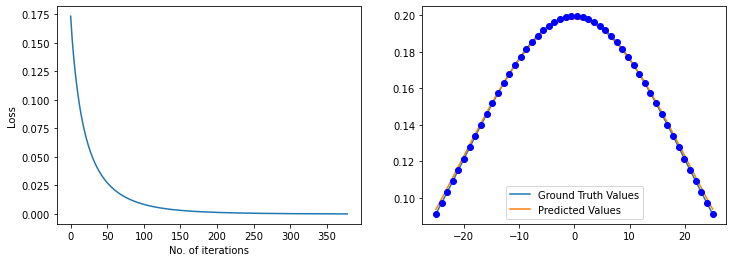

Gradient descent converged at iteration 517
Loss: 9.955705745025868e-06
Tolerance: 1e-05
Learning rate: 20
Estimated values of a, m, s: 10.048432043568225, 0.0007656159543354914, 20.143473294440316


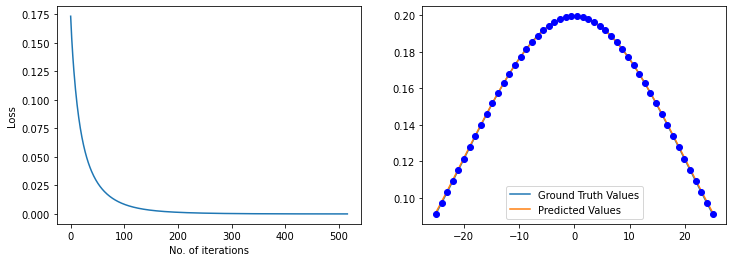

Gradient descent converged at iteration 650
Loss: 9.861754870093795e-07
Tolerance: 1e-06
Learning rate: 20
Estimated values of a, m, s: 10.015156318844848, 3.9357960243611496e-05, 20.044881438013142


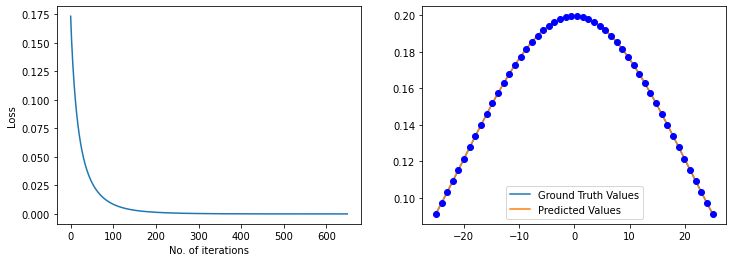

Gradient descent converged at iteration 780
Loss: 9.958414988700271e-08
Tolerance: 1e-07
Learning rate: 20
Estimated values of a, m, s: 10.004807692137192, 2.113991519837328e-06, 20.014234975573352


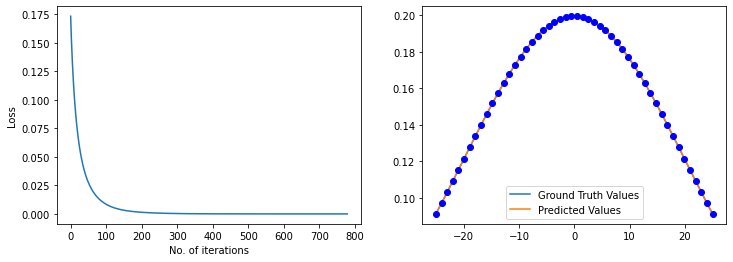

Gradient descent converged at iteration 910
Loss: 9.951564003297182e-09
Tolerance: 1e-08
Learning rate: 20
Estimated values of a, m, s: 10.001518940614924, 1.1272424087196569e-07, 20.004497217434853


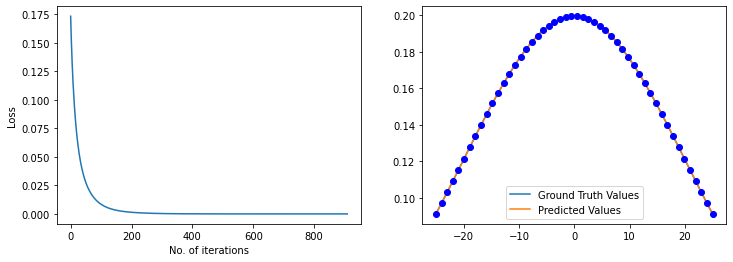

In [36]:
#Gradient Descent
#Experimenting with tolerance values
for tol in tol_arr:
    lr = 20
    ypred, loss = gradientDescent(xobs, yobs, lr, a, m, s, tol)
    plot(xobs, yobs, ypred, loss)

### Observation

With decreasing values of tolerance, it takes more number of iterations to converge.

# Experimenting with learning rates

Gradient descent failed to converge within 1000 iterations
Loss: 0.0006754423441111678
Tolerance: 0.0001
Learning rate: 5


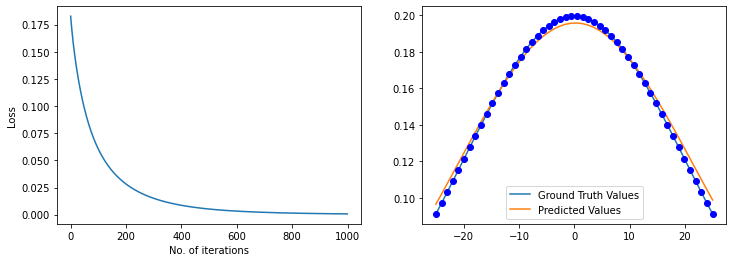

Gradient descent converged at iteration 379
Loss: 9.854902886838485e-05
Tolerance: 0.0001
Learning rate: 20
Estimated values of a, m, s: 10.155014921122431, 0.01540648072203682, 20.459719096178812


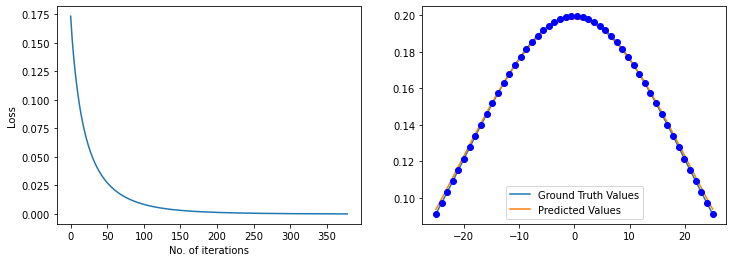

Gradient descent converged at iteration 71
Loss: 9.47513232314814e-05
Tolerance: 0.0001
Learning rate: 110
Estimated values of a, m, s: 10.152026431617898, 0.010141591826874257, 20.450841852175575


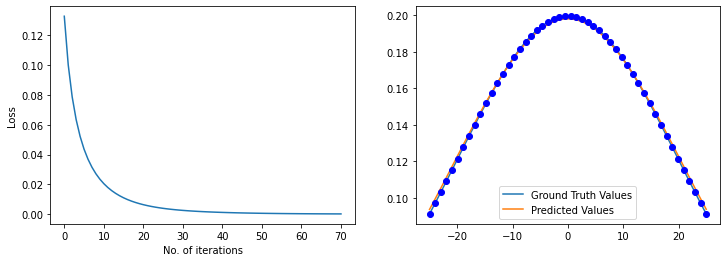

Gradient descent converged at iteration 53
Loss: 9.810173253845631e-05
Tolerance: 0.0001
Learning rate: 150
Estimated values of a, m, s: 10.153948153072525, 0.008430715290413341, 20.459317988347294


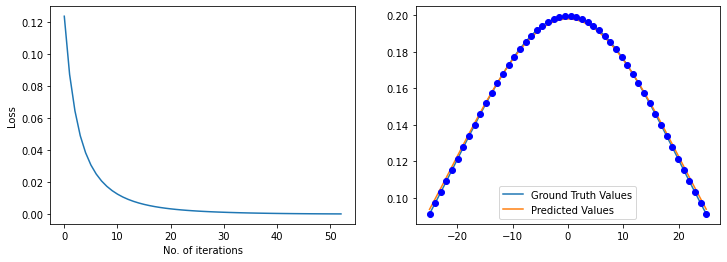

Gradient descent failed to converge within 1000 iterations
Loss: 0.01910756479255467
Tolerance: 0.0001
Learning rate: 156


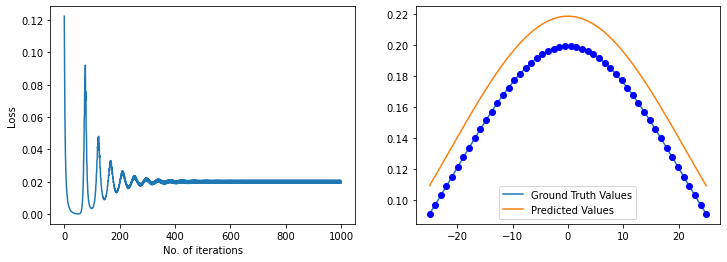

In [37]:
#Experimenting with learning rates
for lr in lr_arr:
    tol = 1e-4
    ypred, loss = gradientDescent(xobs, yobs, lr, a, m, s, tol)
    plot(xobs, yobs, ypred, loss)

### Observation

If the value of learning rate is too low, it takes too many iterations to converge (more than the maximum allowed amount here). If the value of learning rate is too high, convergance is not reached due to the optimizer taking very long jumps in values. In between, the number of iterations taken to converge decreases with an increase in learning rate.

# Experimenting with initial estimates

Gradient descent converged at iteration 382
Loss: 9.875271657924064e-05
Tolerance: 0.0001
Learning rate: 20
Estimated values of a, m, s: 10.155193111772514, 0.014893145051454136, 20.460248222205085


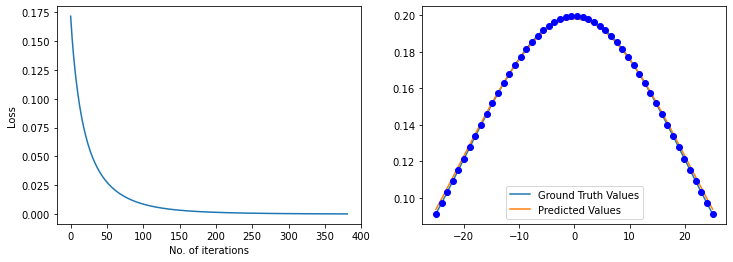

Gradient descent converged at iteration 910
Loss: 9.912407996610016e-05
Tolerance: 0.0001
Learning rate: 20
Estimated values of a, m, s: 10.155681535017226, 0.0005042194712724384, 20.46169735975041


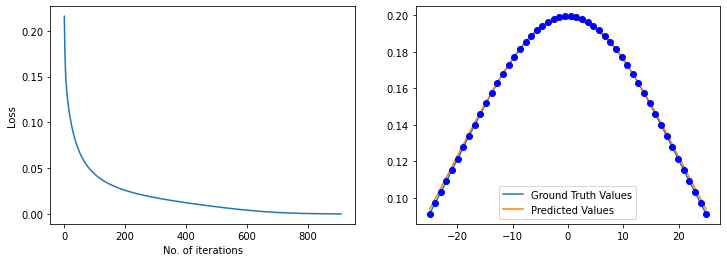

Gradient descent failed to converge within 1000 iterations
Loss: 0.020664275296892607
Tolerance: 0.0001
Learning rate: 20


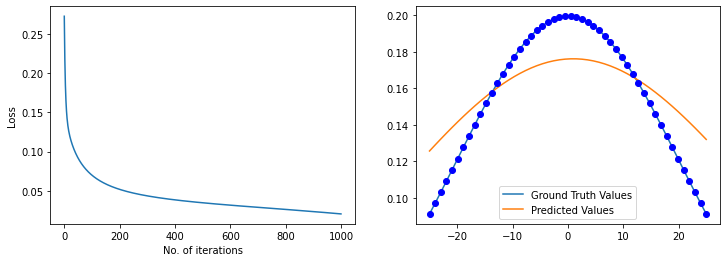

Gradient descent failed to converge within 1000 iterations
Loss: 0.04238994224881588
Tolerance: 0.0001
Learning rate: 20


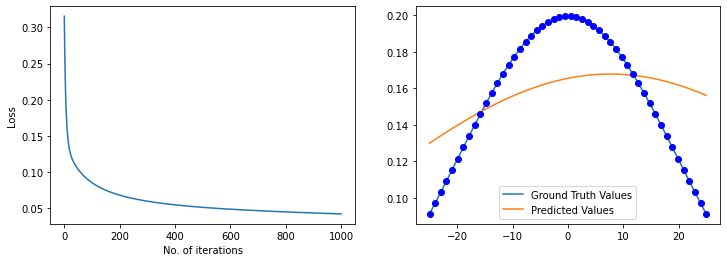

Gradient descent failed to converge within 1000 iterations
Loss: 0.053150311136885606
Tolerance: 0.0001
Learning rate: 20


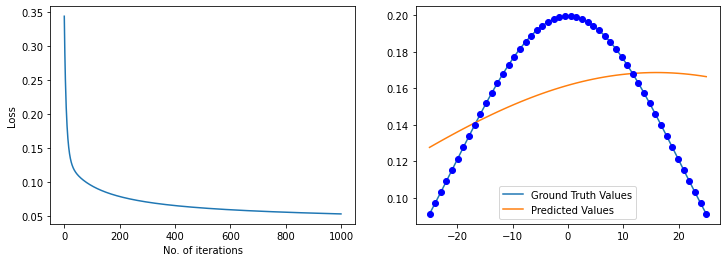

In [38]:
#Experimenting with initial estimates
for i in range(5):
    lr = 20
    tol = 1e-4
    ypred, loss = gradientDescent(xobs, yobs, lr, a_arr[i], m_arr[i], s_arr[i], tol)
    plot(xobs, yobs, ypred, loss)

### Observation
The closer the initial estimates are to the ground truth values, the fewer the number of iterations needed. As we go further away from the ground truth, more number of iterations are needed since the predicted values are very different from the ground truth values. After a point, convergance cannot be reached within the given limited number of interations.

## 1.2: Another Non-Linear function
Now that you've got the hang of computing the jacobian matrix for a non-linear function via the aid of an example, try to compute the jacobian of a secondary gaussian function by carrying out steps similar to what has been shown above. The function is plotted below:
<img src='./helpers/non_linear.png' alt=drawing width=500 height=600>
Using the computed jacobian, optimise for the four parameters using gradient descent, where the parameters to be estimated are: 

$p_1$ = 2,  $p_2$ = 8,  $p_3$ = 4,  $p_4$ = 8. 

Do this for $x_{obs} = np.linspace(-20,30, num\_obs)$,
where $num\_obs$ is 50.



In [61]:
from helpers.func import make_non_linear

In [40]:
def getResidual2(xobs, yobs, p1, p2, p3, p4):
    l = len(xobs)
    residual = np.zeros(l)
    for i in range(l):
        residual[i] = make_non_linear(xobs[i], p1, p2, p3, p4) - yobs[i]
    return residual

In [41]:
def getJacobian2(xobs, p1, p2, p3, p4):
    l = len(xobs)
    jacobian = np.zeros((l, 4))
    for i in range(l):
        jacobian[i][0] = math.exp(-xobs[i] / p2)
        jacobian[i][1] = ( xobs[i] / (p2 ** 2)) * p1 * math.exp(-xobs[i] / p2)
        jacobian[i][2] = math.sin(xobs[i] / p4)
        jacobian[i][3] = - (p3 * xobs[i] / (p4 ** 2)) * math.cos( xobs[i] / p4)
    return jacobian

In [42]:
def getLoss2(xobs, yobs, p1, p2, p3, p4):
    l = len(xobs)
    loss = np.zeros(l)
    for i in range(l):
        loss[i] = (make_non_linear(xobs[i], p1, p2, p3, p4) - yobs[i])**2
    return np.sum(loss)

In [43]:
def gradientDescent2(xobs, yobs, lr, p1, p2, p3, p4, tol):
    converged = False
    max_iter = 1000
    loss = []
    ypred = np.zeros(num_of_obs)
    for i in range(max_iter):
        #find residual and jacobians
        residual = getResidual2(xobs, yobs, p1, p2, p3, p4)
        jacobian_r = getJacobian2(xobs, p1, p2, p3, p4)
        jacobian_f = np.matmul(jacobian_r.T, residual)
        #calculate parameters
        p1 = p1 - lr*jacobian_f[0]
        p2 = p2 - lr*jacobian_f[1]
        p3 = p3 - lr*jacobian_f[2]
        p4 = p4 - lr*jacobian_f[3]
        #find loss and append to array
        current_loss = getLoss2(xobs, yobs, p1, p2, p3, p4)
        loss.append(current_loss)
        #find predicted y value
        for j in range(num_of_obs):
            ypred[j] = make_non_linear(xobs[j], p1, p2, p3, p4)
        #check if current loss is less than tolerance, if yes then converged
        if current_loss < tol:
            print("Gradient descent converged at iteration " + str(i+1))
            print("Loss: " + str(current_loss))
            print("Tolerance: " + str(tol))
            print("Learning rate: " + str(lr))
            print("Estimated values of p1, p2, p3, p4: " + str(p1) + ", " + str(p2) + ", " + str(p3)+ ", " + str(p4))
            converged = True
            break
    if not converged:
        print("Gradient descent failed to converge within 1000 iterations")
        print("Loss: " + str(current_loss))
        print("Tolerance: " + str(tol))
        print("Learning rate: " + str(lr))
    loss = np.array(loss)
    
    return ypred, loss

Gradient descent converged at iteration 905
Loss: 9.916197517177105e-06
Tolerance: 1e-05
Learning rate: 0.001
Estimated values of p1, p2, p3, p4: 1.9994640124888066, 7.998987639322966, 3.9998300600001544, 8.000193954694321


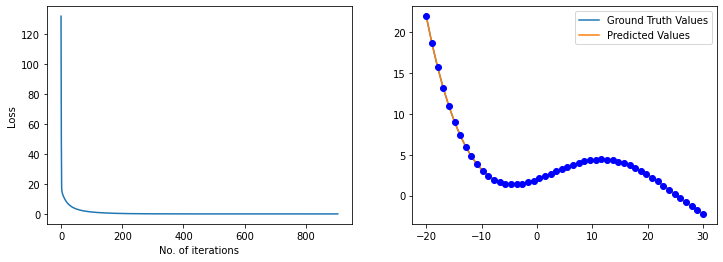

In [54]:
p1 = 0
p2 = 7
p3 = 4
p4 = 7.6
p1_gt = 2
p2_gt = 8
p3_gt = 4
p4_gt = 8
lr = 0.001
tol = 1e-5
num_of_obs = 50
xobs = np.linspace(-20, 30, num_of_obs)
yobs = np.zeros(num_of_obs)
for j in range(num_of_obs):
    yobs[j] = make_non_linear(xobs[j], p1_gt, p2_gt, p3_gt, p4_gt)
ypred, loss = gradientDescent2(xobs, yobs, lr, p1, p2, p3, p4, tol)
plot(xobs, yobs, ypred, loss)

## 1.3: Different Optimizers

Replace gradient descent with Gauss-Newton and Levenberg Marquardt algorithms and repeat question 1.1. 

To quickly recap, Gauss-Newton and Levenberg Marquardt are alternate update rules to the standard gradient descent. Gauss Newton updates work as:

$$\delta x = -(J^TJ)^{-1}J^Tf(x)$$

Levenberg Marquardt lies somewhere between Gauss Newton and Gradient Descent algorithms by blending the two formulations. As a result, when at a steep cliff, LM takes small steps to avoid overshooting, and when at a gentle slope, LM takes bigger steps:


$$\delta x = -(J^TJ + \lambda I)^{-1}J^Tf(x)$$

**Questions**
   * 1. How does the choice of initial estimate and learning rate affect convergence? Observations and analysis from repeated runs with modified hyperparameters will suffice.
   * 2. Do you notice any difference between the three optimizers? Why do you think that is? (If you are unable to see a clear trend, what would you expect in general based on what you know about them)

# Gauss Newton

In [79]:
def gaussNewton(xobs, yobs, a, m, s, tol):
    converged = False
    max_iter = 1000
    loss = []
    for i in range(max_iter):
        #find residual and jacobians
        residual = getResidual(xobs, yobs, a, m, s)
        jacobian_r = getJacobian(xobs, a, m, s)
        delta = np.matmul(np.linalg.pinv(jacobian_r), residual)
        #calculate parameters
        a = a - delta[0]
        m = m - delta[1]
        s = s - delta[2]
        #find loss and append to array
        current_loss = getLoss(xobs, yobs, a, m, s)
        loss.append(current_loss)
        #find predicted y value
        ypred = make_gaussian(xobs, a, m, s)
        #check if current loss is less than tolerance, if yes then converged
        if current_loss < tol:
            print("Gauss newton converged at iteration " + str(i+1))
            print("Loss: " + str(current_loss))
            print("Tolerance: " + str(tol))
            print("Estimated values of a, m, s: " + str(a) + ", " + str(m) + ", " + str(s))
            converged = True
            break
    if not converged:
        print("Gauss newton failed to converge within 1000 iterations")
        print("Loss: " + str(current_loss))
        print("Tolerance: " + str(tol))
    loss = np.array(loss)
    
    return ypred, loss

In [156]:
#Estimated values of a, m, s
a = 10
m = 13
s = 19.12
#Ground truth values of a, m, s
a_gt = 10
m_gt = 0
s_gt = 20
num_of_obs = 50
xobs = np.linspace(-25, 25, num_of_obs)
yobs = make_gaussian(xobs, a_gt, m_gt, s_gt)
tol_arr = [1e-6, 1e-10, 1e-14, 1e-18, 1e-22]
a_arr = [10, 13, 16, 19, 22]
m_arr = [13, 18, 20, 24, 26]
s_arr = [19.2, 22.2, 25.2, 28.2, 31.2]

# Experimenting with tolerance values

Gauss newton converged at iteration 4
Loss: 1.6746688369545772e-08
Tolerance: 1e-06
Estimated values of a, m, s: 9.999840546557312, -0.0003359127614166457, 20.002625252976067


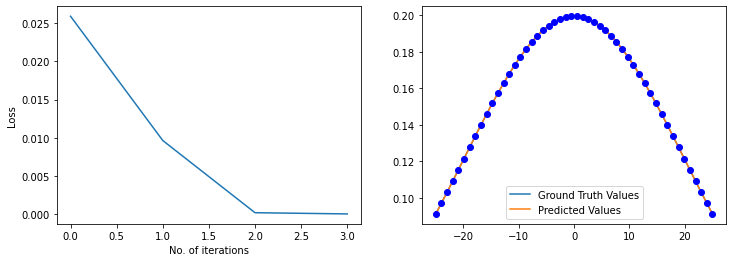

Gauss newton converged at iteration 5
Loss: 2.9045894405429825e-16
Tolerance: 1e-10
Estimated values of a, m, s: 9.999999833519432, 1.02935382132244e-07, 19.99999930909869


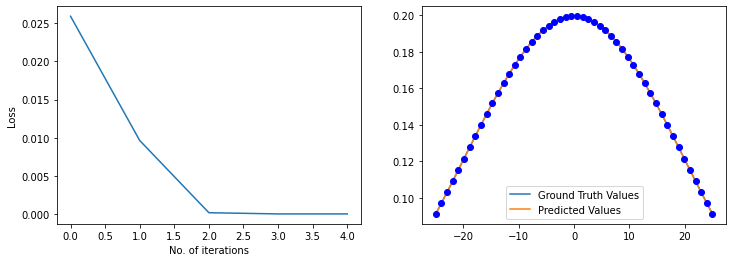

Gauss newton converged at iteration 5
Loss: 2.9045894405429825e-16
Tolerance: 1e-14
Estimated values of a, m, s: 9.999999833519432, 1.02935382132244e-07, 19.99999930909869


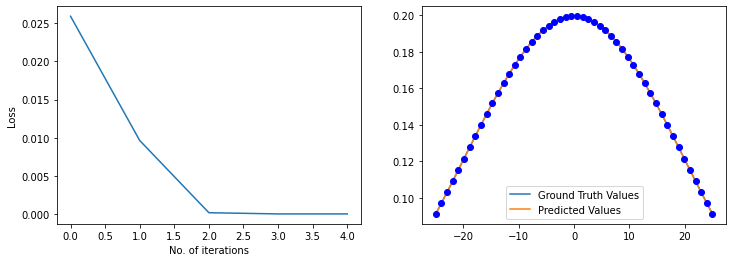

Gauss newton converged at iteration 6
Loss: 5.912604929268814e-31
Tolerance: 1e-18
Estimated values of a, m, s: 9.999999999999991, 6.8778088656014534e-15, 19.999999999999968


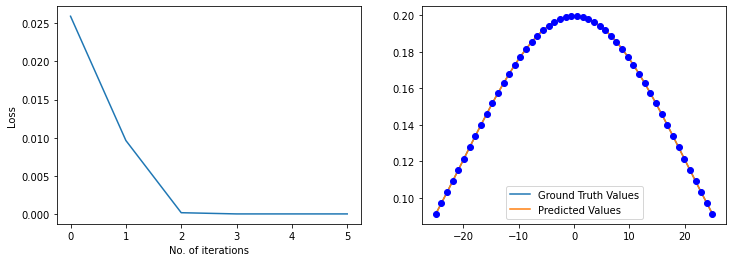

Gauss newton converged at iteration 6
Loss: 5.912604929268814e-31
Tolerance: 1e-22
Estimated values of a, m, s: 9.999999999999991, 6.8778088656014534e-15, 19.999999999999968


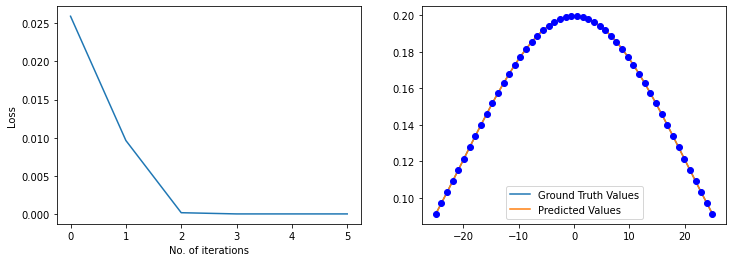

In [81]:
for tol in tol_arr:
    ypred, loss = gaussNewton(xobs, yobs, a, m, s, tol)
    plot(xobs, yobs, ypred, loss)

### Observation

With decreasing tolerance values, number of iterations taken to converge increases, but the decrease in tolerance must be significantly high to decrease the number of iterations.

# Experimenting with initial estimates

Gauss newton converged at iteration 5
Loss: 2.920103928091765e-16
Tolerance: 1e-10
Estimated values of a, m, s: 9.999999851527996, 2.3995186736690526e-07, 19.99999937801824


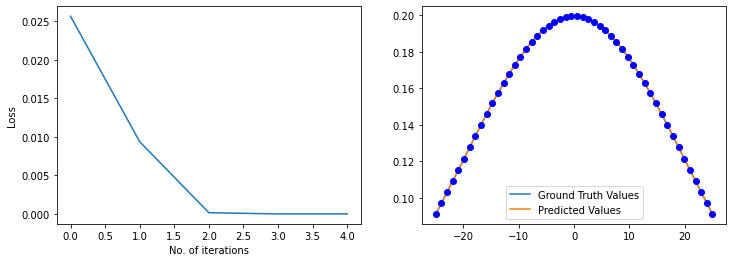

Gauss newton converged at iteration 6
Loss: 7.800694447313865e-17
Tolerance: 1e-10
Estimated values of a, m, s: 9.999999938447246, 2.3498326953154923e-07, 19.99999990470997


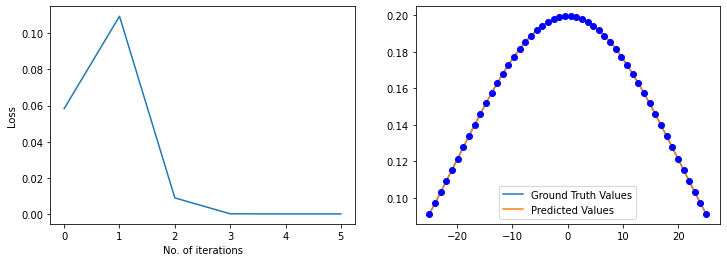

Gauss newton converged at iteration 6
Loss: 1.2758380362100226e-14
Tolerance: 1e-10
Estimated values of a, m, s: 9.999999614428265, -6.712921812347672e-07, 20.000001646356687


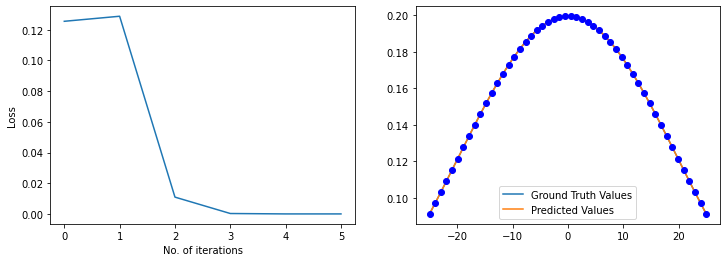

Gauss newton converged at iteration 8
Loss: 8.132166165338364e-15
Tolerance: 1e-10
Estimated values of a, m, s: 9.999999755374644, -9.954419088343408e-07, 20.00000136546915


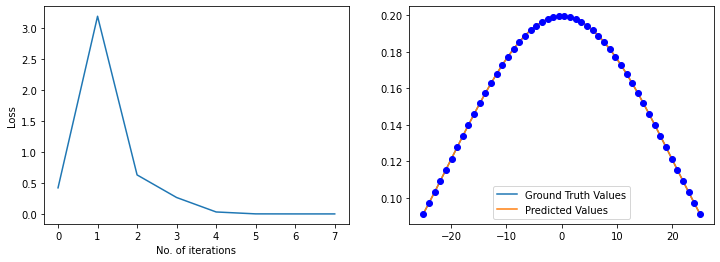

Gauss newton failed to converge within 1000 iterations
Loss: 0.06092636206855147
Tolerance: 1e-10


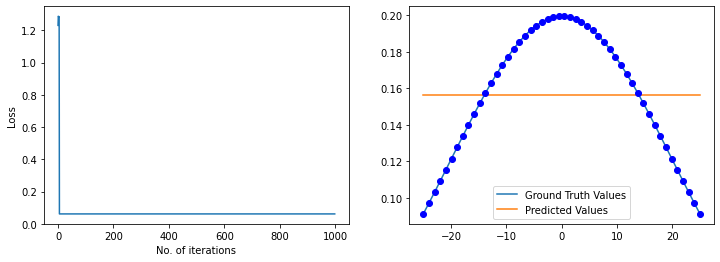

In [157]:
for i in range(5):
    tol = 1e-10
    ypred, loss = gaussNewton(xobs, yobs, a_arr[i], m_arr[i], s_arr[i], tol)
    plot(xobs, yobs, ypred, loss)

### Observation

As estimates get farther away from ground truth values, the number of iterations taken to converge increase and for relatively far off values it fails to converge.

# Levenberg Marquardt

In [116]:
def levenbergMarquardt(xobs, yobs, lr, a, m, s, tol):
    converged = False
    max_iter = 1000
    loss = []
    for i in range(max_iter):
        #find residual and jacobians
        residual = getResidual(xobs, yobs, a, m, s)
        jacobian_r = getJacobian(xobs, a, m, s)
        I = np.eye(3)
        delta = np.matmul(np.matmul(np.linalg.pinv(np.matmul(jacobian_r.T, jacobian_r) + (lr*I)), jacobian_r.T), residual)
        #calculate parameters
        a = a - delta[0]
        m = m - delta[1]
        s = s - delta[2]
        #find loss and append to array
        current_loss = getLoss(xobs, yobs, a, m, s)
        loss.append(current_loss)
        #find predicted y value
        ypred = make_gaussian(xobs, a, m, s)
        #check if current loss is less than tolerance, if yes then converged
        if current_loss < tol:
            print("Levenberg Marquardt converged at iteration " + str(i+1))
            print("Loss: " + str(current_loss))
            print("Tolerance: " + str(tol))
            print("Damping rate: " + str(lr))
            print("Estimated values of a, m, s: " + str(a) + ", " + str(m) + ", " + str(s))
            converged = True
            break
    if not converged:
        print("Levenberg Marquardt failed to converge within 1000 iterations")
        print("Loss: " + str(current_loss))
        print("Tolerance: " + str(tol))
        print("Damping rate: " + str(lr))
    loss = np.array(loss)
    
    return ypred, loss

In [150]:
#Estimated values of a, m, s
a = 10
m = 13
s = 19.12
#Ground truth values of a, m, s
a_gt = 10
m_gt = 0
s_gt = 20
num_of_obs = 50
xobs = np.linspace(-25, 25, num_of_obs)
yobs = make_gaussian(xobs, a_gt, m_gt, s_gt)
tol_arr = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
lr_arr = [0.001, 0.005, 0.01, 0.1, 0.15]
a_arr = [10, 13, 16, 19, 22]
m_arr = [13, 16, 19, 22, 25]
s_arr = [19.2, 22.2, 25.2, 28.2, 31.2]

# Experimenting with tolerance values

Levenberg Marquardt converged at iteration 79
Loss: 9.961043551780019e-05
Tolerance: 0.0001
Damping rate: 0.01
Estimated values of a, m, s: 10.155788252412773, 0.017048150335676082, 20.462146120222766


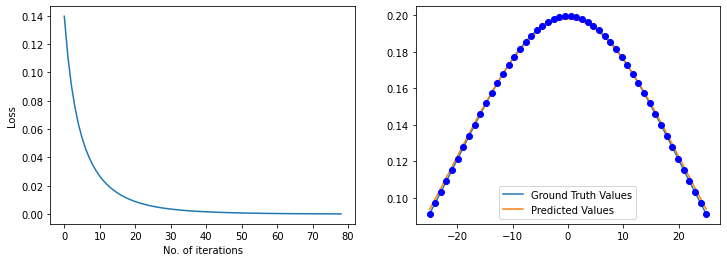

Levenberg Marquardt converged at iteration 108
Loss: 9.492833722527644e-06
Tolerance: 1e-05
Damping rate: 0.01
Estimated values of a, m, s: 10.0472787767949, 0.0008782103086059894, 20.140068394823178


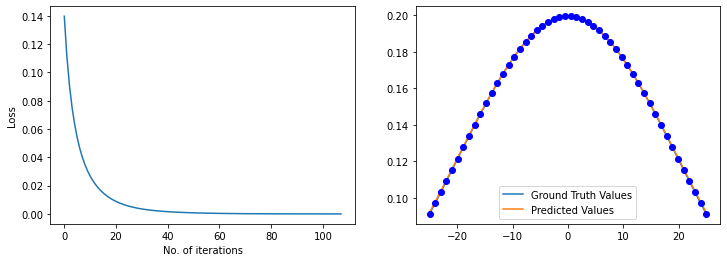

Levenberg Marquardt converged at iteration 135
Loss: 9.631701018796566e-07
Tolerance: 1e-06
Damping rate: 0.01
Estimated values of a, m, s: 10.014977603567933, 5.1970213307722646e-05, 20.044353508291703


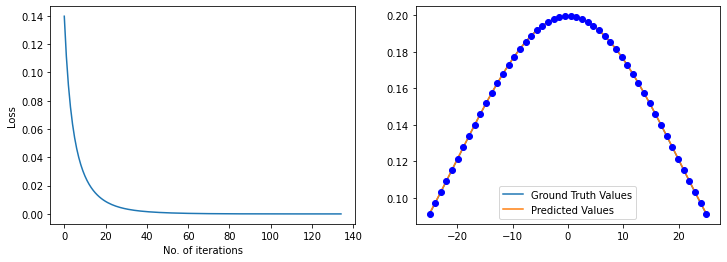

Levenberg Marquardt converged at iteration 162
Loss: 9.464186382605513e-08
Tolerance: 1e-07
Damping rate: 0.01
Estimated values of a, m, s: 10.004686733596937, 3.0136758555127427e-06, 20.01387694926302


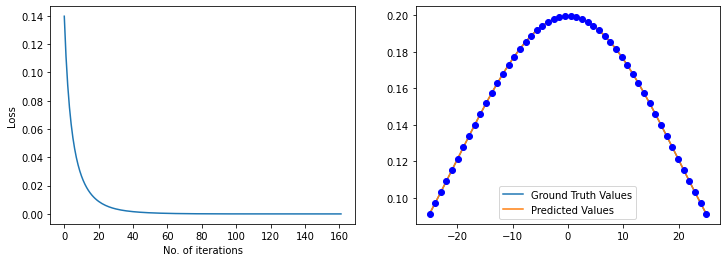

Levenberg Marquardt converged at iteration 189
Loss: 9.204622285611138e-09
Tolerance: 1e-08
Damping rate: 0.01
Estimated values of a, m, s: 10.001460806030373, 1.736371158632913e-07, 20.004325105259586


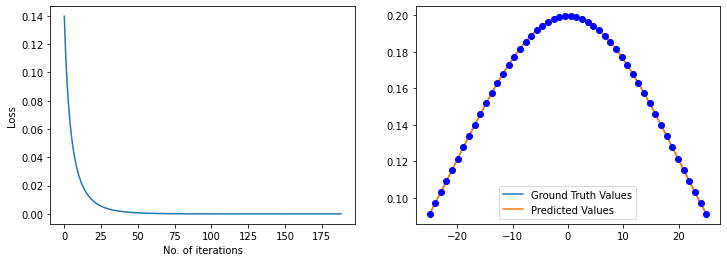

In [140]:
for tol in tol_arr:
    lr = 0.01
    ypred, loss = levenbergMarquardt(xobs, yobs, lr, a, m, s, tol)
    plot(xobs, yobs, ypred, loss)

### Observation

As tolerance decreases, the number of iterations taken to converge increase.

# Experimenting with damping rates

Levenberg Marquardt converged at iteration 11
Loss: 8.060899156858536e-05
Tolerance: 0.0001
Damping rate: 0.001
Estimated values of a, m, s: 10.139405609023664, 0.014863540973488902, 20.414675102059107


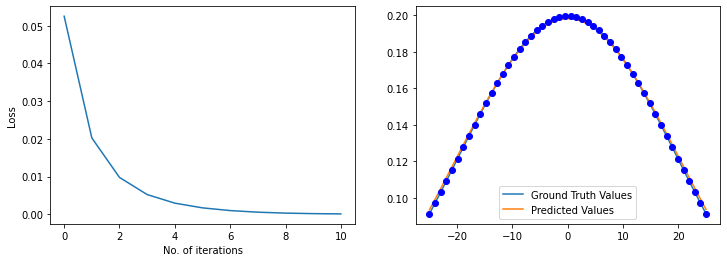

Levenberg Marquardt converged at iteration 42
Loss: 8.906753828352856e-05
Tolerance: 0.0001
Damping rate: 0.005
Estimated values of a, m, s: 10.147087355830786, 0.01500561991479955, 20.436415078278177


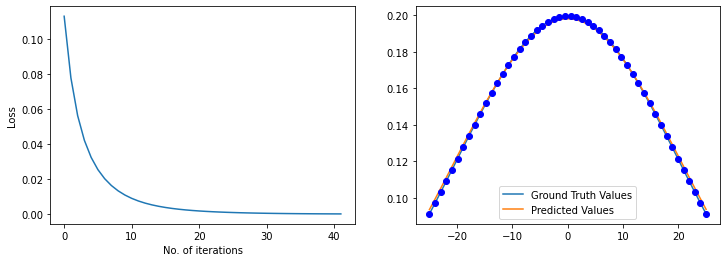

Levenberg Marquardt converged at iteration 79
Loss: 9.961043551780019e-05
Tolerance: 0.0001
Damping rate: 0.01
Estimated values of a, m, s: 10.155788252412773, 0.017048150335676082, 20.462146120222766


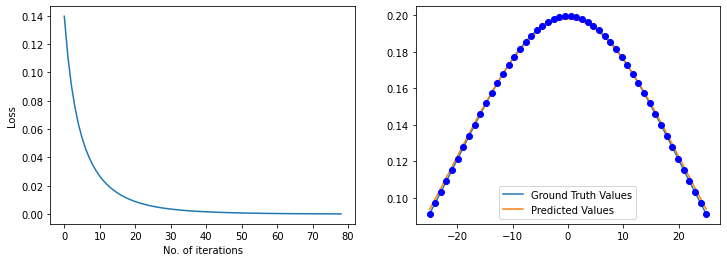

Levenberg Marquardt converged at iteration 757
Loss: 9.961374536292559e-05
Tolerance: 0.0001
Damping rate: 0.1
Estimated values of a, m, s: 10.155832240896244, 0.01684246651460858, 20.462159694295767


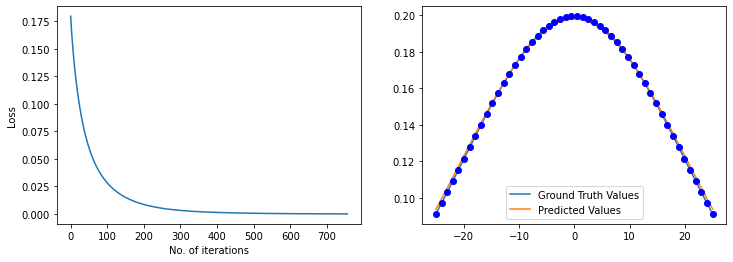

Levenberg Marquardt failed to converge within 1000 iterations
Loss: 0.0001989744436125699
Tolerance: 0.0001
Damping rate: 0.15


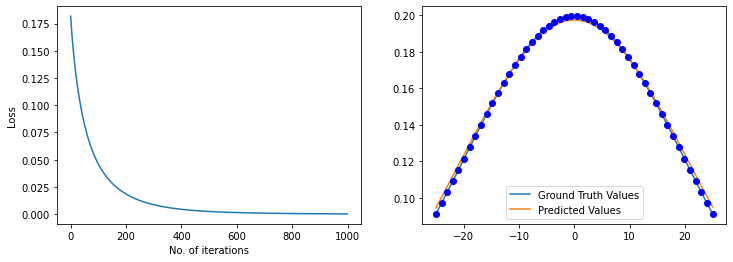

In [139]:
for lr in lr_arr:
    tol = 1e-4
    ypred, loss = levenbergMarquardt(xobs, yobs, lr, a, m, s, tol)
    plot(xobs, yobs, ypred, loss)

### Observation

As damping rate decreases, number of iterations to reach convergence increases, and after a point it fails to converge within the limited number of iterations.

# Experimenting with initial estimates

Levenberg Marquardt converged at iteration 80
Loss: 9.663854205130405e-05
Tolerance: 0.0001
Damping rate: 0.01
Estimated values of a, m, s: 10.153409752706418, 0.01585049118454214, 20.455077956231747


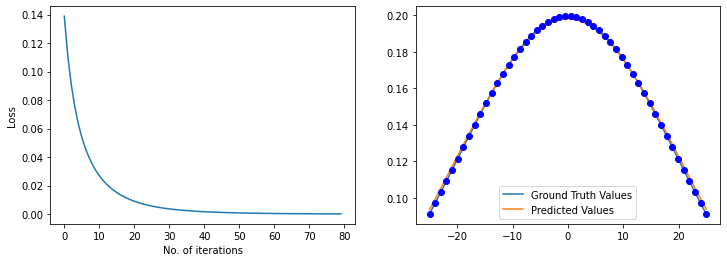

Levenberg Marquardt converged at iteration 139
Loss: 9.669424568951607e-05
Tolerance: 0.0001
Damping rate: 0.01
Estimated values of a, m, s: 10.153669159098532, 0.0016602106170301558, 20.455846065872404


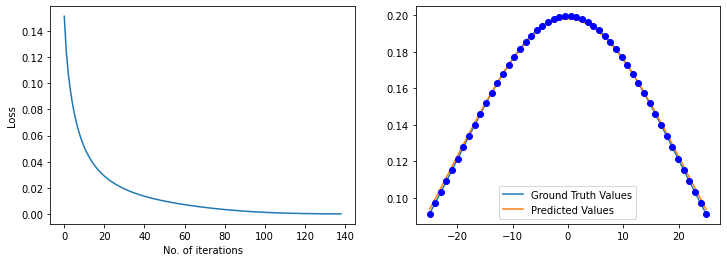

Levenberg Marquardt converged at iteration 213
Loss: 9.74560004734765e-05
Tolerance: 0.0001
Damping rate: 0.01
Estimated values of a, m, s: 10.154291917267788, 0.0003885031246540667, 20.457696549648237


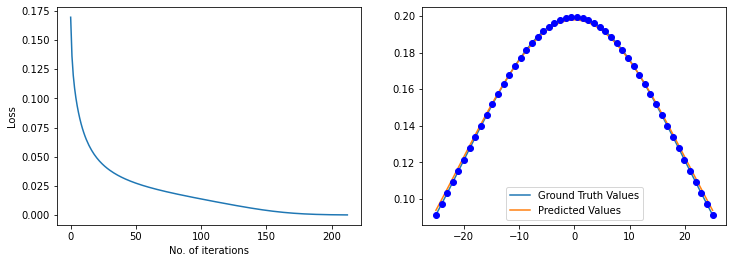

Levenberg Marquardt converged at iteration 315
Loss: 9.352997879517572e-05
Tolerance: 0.0001
Damping rate: 0.01
Estimated values of a, m, s: 10.151068850476413, 0.0001210288233574686, 20.44811951794356


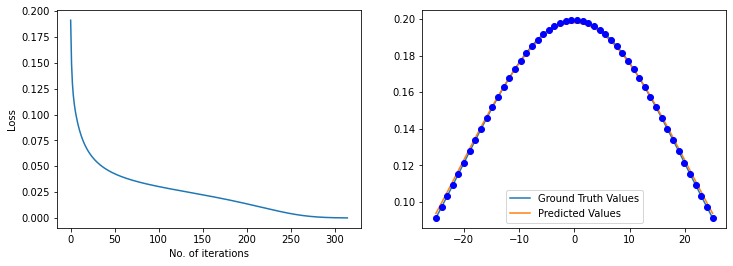

Levenberg Marquardt converged at iteration 454
Loss: 9.872969365073968e-05
Tolerance: 0.0001
Damping rate: 0.01
Estimated values of a, m, s: 10.155324483738747, 5.2305641169137634e-05, 20.4607648455154


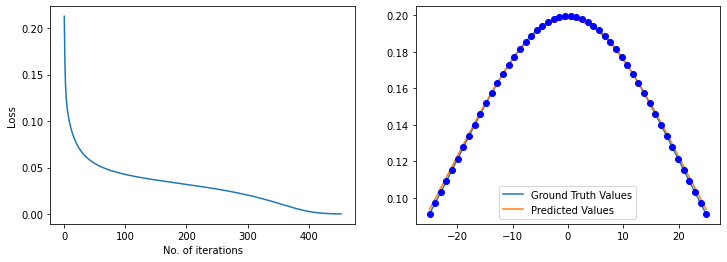

In [151]:
for i in range(5):
    lr = 0.01
    tol = 1e-4
    ypred, loss = levenbergMarquardt(xobs, yobs, lr, a_arr[i], m_arr[i], s_arr[i], tol)
    plot(xobs, yobs, ypred, loss)

### Observation

As the initial estimates go farther away from the ground truth values, number of iterations taken to converge increase.

# Comparing the optimizers

In general, the trends observed from the experimental observations indicate that Gauss Newton converges faster than Gradient Descent, which is rather slow. This is because of the larger steps taken by the Gauss Newton method. Specifically considering the Levenberg Marquardt, we can say that the method tends to behave like the Gauss Newton method when the damping factor is small, and the Gradient Descent method when the damping factor is lage. In the case of Gauss Newton, if the initial estimates are far from the ground truth values, the algorithm fails to converge. In this sense, the Levenberg Marquardt method is more robust and can handle rather far off values as well.

# 2. Iterative Closest Point

In this subsection, we will code the Iterative Closest Point algorithm to find the alignment between two point clouds without known correspondences. The point cloud that you will be using is the same as the one that you used in Assignment 1.

## 2.1: Procrustes alignment

1. Write a function that takes two point clouds as input wherein the corresponding points between the two point clouds are located at the same index and returns the transformation matrix between them.
2. Use the bunny point cloud and perform the procrustes alignment between the two bunnies. Compute the absolute alignment error after aligning the two bunnies.
3. Make sure your code is modular as we will use this function in the next sub-part.
4. Prove mathematically why the Procrustes alignment gives the best aligning transform between point clouds with known correspondences.


In [18]:
#Function which returns transformation, rotation and translation matrices
def procrustes(pts_1, pts_2):
    c1 = np.mean(pts_1, axis = 1)[..., None]
    c2 = np.mean(pts_2, axis = 1)[..., None]
    X = pts_1 - c1
    Y = pts_2 - c2
    S = np.dot(X, Y.T)
    U, s, Vt = np.linalg.svd(S)
    R = np.dot(U, Vt)
    if np.linalg.det(R) < 0:
        Vt[2,:] *= -1
        R = np.dot(U, Vt)
    t = c1 - R@c2
    T = np.zeros((4, 4))
    for i in range(3):
        for j in range(3):
            T[i][j] = R[i][j]
        T[3][i] = 0
        T[i][3] = t[i]
    T[3][3] = 1
    return T, R, t

In [20]:
#Alignment
pcd = o3d.io.read_point_cloud("bunny.ply").voxel_down_sample(0.005)
axes = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5, origin=(0,0,0))
pcd1 = o3d.io.read_point_cloud("bunny.ply").voxel_down_sample(0.005)
R = np.asarray([[1, 0, 0], [0, 0, -1], [0, 1, 0]])
t = np.asarray([[0.1], [0.0], [0.0]])
T = np.asarray([[1, 0, 0, 0.1], [0, 0, -1, 0], [0, 1, 0, 0], [0, 0, 0, 1]])
print("Transformation matrix: ")
print(T)
axes2 = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5, origin=(0,0,0)).transform(T)
pts_1 = np.asarray(pcd.points).T
pts_2 = np.asarray(R@pts_1 + t)
pcd1 = o3d.geometry.PointCloud()
pcd1.points = o3d.utility.Vector3dVector(pts_2.T)
T, R, t = procrustes(pts_2, pts_1)
print("Transformation matrix by Procrustes alignment: ")
print(np.around(T, decimals = 4))
pcd_final = o3d.io.read_point_cloud("bunny.ply").voxel_down_sample(0.005).transform(T)
pcd = pcd.paint_uniform_color([0.8, 0, 1])
o3d.visualization.draw_geometries([pcd, axes, axes2, pcd1, pcd_final])

Transformation matrix: 
[[ 1.   0.   0.   0.1]
 [ 0.   0.  -1.   0. ]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   0.   1. ]]
Transformation matrix by Procrustes alignment: 
[[ 1.  -0.  -0.   0.1]
 [-0.  -0.  -1.  -0. ]
 [-0.   1.  -0.   0. ]
 [ 0.   0.   0.   1. ]]


The point cloud is translated and roatated to create a second point cloud. Using the Procrustes alignment method, we find an estimated transformation matrix. This transformation is applied to the original point cloud, and we visualize all 3 point cloud together (original, tranformed, transformed with estimation).

In [21]:
#Absolute alignment error
X = np.asarray(pcd1.points).T
Y = np.asarray(pcd_final.points).T
print(np.mean(np.square(Y - X)))

2.4439683864970233e-33


![title](proof.jpeg)

## 2.2: ICP alignment

1. Write a function that takes two point clouds as input without known correspondences and perform the iterative closest point algorithm.
2. Perform the ICP alignment between the two bunnies and plot their individual coordinate frames as done in class.
3. Does ICP always give the correct alignment? Why or Why not?
4. What are other variants of ICP and why are they helpful (you can look at point to plane ICP)?

In [22]:
def find_nearest_neighbor(pts_1, pts_2):
    pts_1 = pts_1.T
    pts_2 = pts_2.T
    kdt = KDTree(pts_2)
    distances, indices = kdt.query(pts_1)
    return distances, indices

In [23]:
def ICP(pts_1, pts_2, max_iter, tol, coord_frame_1, coord_frame_2):
    
    converged = False
    
    #Visualization before alignment
    pcd1 = o3d.geometry.PointCloud()
    pcd1.points = o3d.utility.Vector3dVector(pts_1.T)
    pcd2 = o3d.geometry.PointCloud()
    pcd2.points = o3d.utility.Vector3dVector(pts_2.T)
    pcd2 = pcd2.paint_uniform_color([0.8, 0, 1])
    o3d.visualization.draw_geometries([pcd1, pcd2, coord_frame_1, coord_frame_2])
    
    prev_dist = np.mean(np.square(pts_1 - pts_2))
    TA = np.eye(4)
    for iteration in range(max_iter):
        #Find nearest neighbour
        distances = np.zeros(pts_1.shape[1])
        indices = np.zeros(pts_1.shape[1], dtype = int)
        distances1, indices1 = find_nearest_neighbor(pts_1, pts_2)
        for i in range(distances1.shape[0]):
            distances[i] = distances1[i][0]
            indices[i] = indices1[i][0]
        
        #Check tolerance
        if iteration == 0:
            prev_dist = np.mean(np.square(distances))
        else:
            dist = np.mean(np.square(distances))
            if np.abs(dist - prev_dist) < tol:
                print("ICP alignment converged at " + str(iteration + 1) + " iterations")
                converged = True
                break
            else:
                prev_dist = dist
        #Align
        pts_2_nearest = pts_2[:, indices]
        T, R, t = procrustes(pts_1, pts_2_nearest)
        TA = TA@np.linalg.inv(T)
        pts_2 = R@pts_2 + t
        
        coord_frame_2 = coord_frame_2.transform(T)
    
    if not converged:
        print("ICP alignment failed to converge within " + str(max_iter) + " iterations")
    
    #Visualization after alignment
    pcd1 = o3d.geometry.PointCloud()
    pcd1.points = o3d.utility.Vector3dVector(pts_1.T)
    pcd2 = o3d.geometry.PointCloud()
    pcd2.points = o3d.utility.Vector3dVector(pts_2.T)
    pcd2 = pcd2.paint_uniform_color([0.8, 0, 1])
    o3d.visualization.draw_geometries([pcd1, pcd2, coord_frame_1, coord_frame_2])
    
    return TA

In [24]:
pcd = o3d.io.read_point_cloud("bunny.ply").voxel_down_sample(0.005)
axes = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5, origin=(0,0,0))
pcd1 = o3d.io.read_point_cloud("bunny.ply").voxel_down_sample(0.005)
R = np.asarray([[1, 0, 0], [0, 0, -1], [0, 1, 0]])
t = np.asarray([[0.1], [0.0], [0.0]])
T = np.asarray([[1, 0, 0, 0.1], [0, 0, -1, 0], [0, 1, 0, 0], [0, 0, 0, 1]])
axes2 = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5, origin=(0,0,0)).transform(T)
pts_2 = np.asarray(pcd.points).T
pts_1 = np.asarray(R@pts_2 + t)
pcd1 = o3d.geometry.PointCloud()
pcd1.points = o3d.utility.Vector3dVector(pts_1.T)
max_iter = 1000
tol = 0.00000001
T_icp = ICP(pts_1, pts_2, max_iter, tol, axes2, axes)
print("Actual transformation matrix: ")
print(T)
print("Transformation matrix through ICP: ")
print(np.around(T_icp, decimals = 4))

ICP alignment converged at 108 iterations
Actual transformation matrix: 
[[ 1.   0.   0.   0.1]
 [ 0.   0.  -1.   0. ]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   0.   1. ]]
Transformation matrix through ICP: 
[[ 1.  -0.   0.  -0.1]
 [-0.  -0.   1.   0. ]
 [ 0.  -1.   0.  -0. ]
 [ 0.   0.   0.   1. ]]


#### Does ICP always give the correct alignment? Why or Why not?

If ICP is applied to all the points, it applies least squares regression to all the points which averages out minor errors in point locations. Since ICP repeats the process until convergence, it gives a correct alignment. Correct alignment could mean perfect alignment after rounding off reasonably or the alignment that minimizes the error. In this sense of the word, ICP always gives the correct alignment for point set registration in the same scale, however this is not always the case in different scales. Additionally, if the field of vision is too narrow or in the presence of too much noise, ICP may not be very effective.

#### What are other variants of ICP and why are they helpful (you can look at point to plane ICP)?

- Point to Plane: This approach minimizes the distance between one of the points and the plane passing through the other and perpendicular to its normal. This performs better in structured environments and leads to faster convergence because sliding two planes along each other doesn’t increase the distance between them, whereas in point to point, the pairs of points in the flat region will prevent the scans from sliding along each other to reach the correct transformation.
- Projection to find Correspondences: Finding the closest point is the most time-consuming step of ICP, however if we just use the result of projecting a point onto the grid as the correspondence it is very fast and accurate in cases where you are already close to the right answer. It works in constant time, and does not require precomputing a spatial data structure which makes it very fast. However, this works for range images.
- Closest Compatible Point: Since the closest point is often a bad approximation for the most compatible point, we try to find better ones by selecting the closest point that is compatible with the source point, by some metrics. Therefore, the matching effectiveness is improved by restricting the match to compatible points on the basis of colors, normals, etc. giving better accuracy overall.
- Stable Sampling: Here, we select samples on the scan that are the most relevant to constraining all the different degrees of freedom of the transformation we are solving for. The eigenvalues of the covariance matrix encode the stability of transformations, so we choose points that prevent small eigenvalues, and increase the stability. Therefore, stability-based sampling gives a better result than ICP, even though it may take more time sometimes.